Dataset shape: (226278, 9)
Date coverage: 2021-08-19 to 2021-08-25

Missing values per column:
 event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


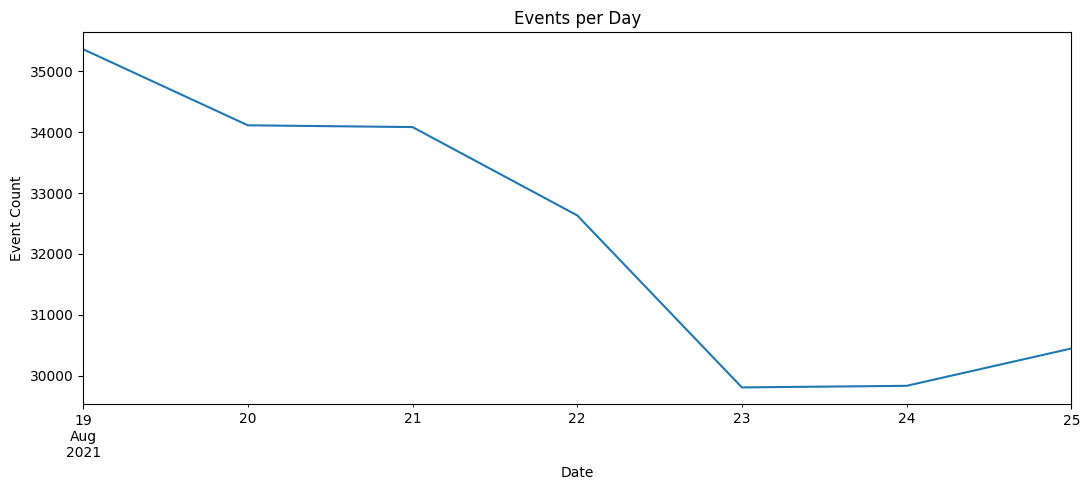

C:\Users\dell\AppData\Local\Temp\ipykernel_22032\674937163.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_stats.index, x=country_stats.values, palette='Blues')


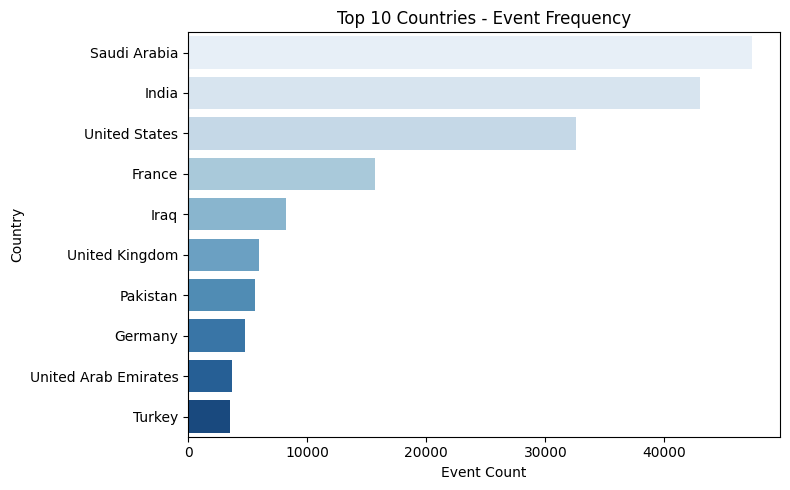

C:\Users\dell\AppData\Local\Temp\ipykernel_22032\674937163.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=artist_stats.index, x=artist_stats.values, palette='Purples')


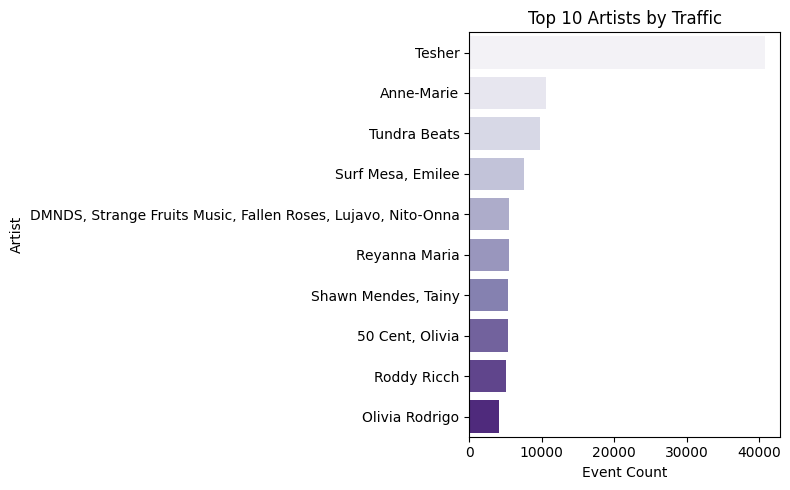

C:\Users\dell\AppData\Local\Temp\ipykernel_22032\674937163.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=track_stats.index, x=track_stats.values, palette='Greens')


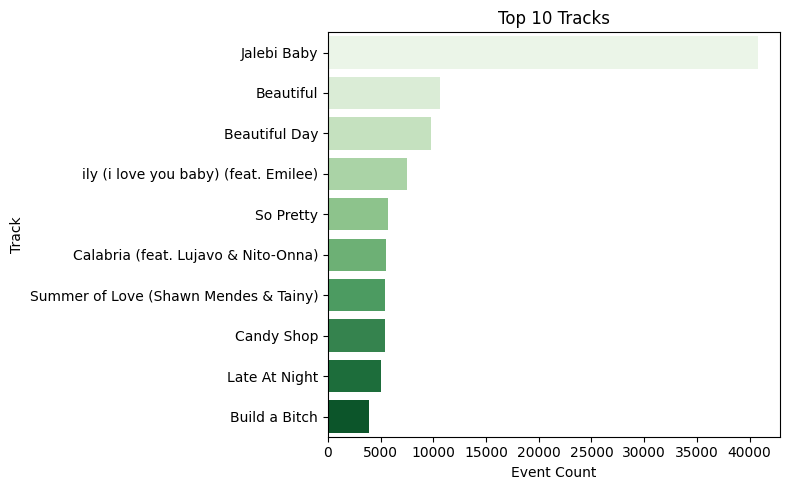

C:\Users\dell\AppData\Local\Temp\ipykernel_22032\674937163.py:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.set_index('date').resample('M').size()


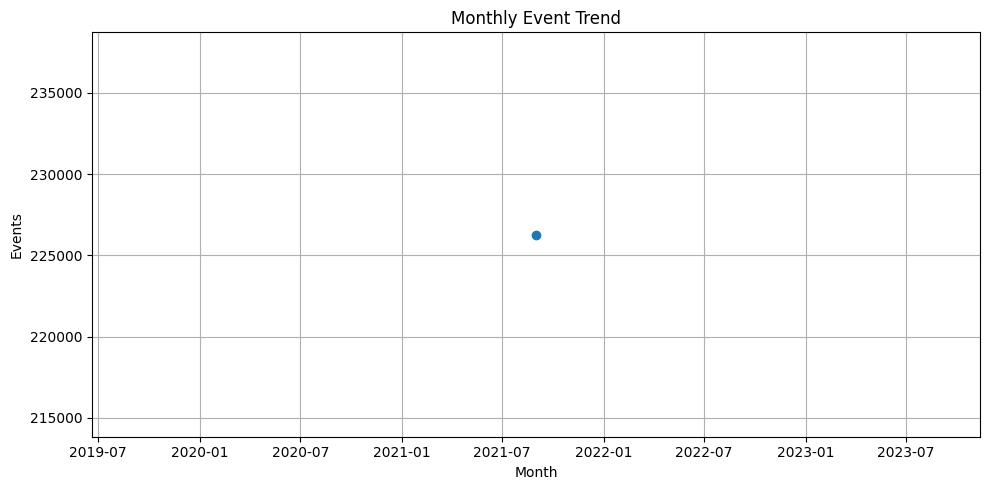


Website Traffic Summary KPIs:

               Metric       Value
0        Total Events      226278
1     Total Countries         211
2        Total Cities       11993
3       Total Artists        2419
4        Total Tracks        3562
5  Total Unique Links        3839
6    First Event Date  2021-08-19
7     Last Event Date  2021-08-25


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Upload & Preview Data ---
data_file = 'traffic.csv'
df = pd.read_csv(data_file)

# --- Data Preparation ---
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Quick glance at data structure
print(f"Dataset shape: {df.shape}")
print(f"Date coverage: {df['date'].min().date()} to {df['date'].max().date()}\n")
print("Missing values per column:\n", df.isnull().sum())

# --- Daily Event Trends ---
events_per_day = df.groupby('date').size()
plt.figure(figsize=(11,5))
events_per_day.plot()
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.tight_layout()
plt.show()

# --- Top Countries by Event Count ---
country_stats = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(y=country_stats.index, x=country_stats.values, palette='Blues')
plt.title('Top 10 Countries - Event Frequency')
plt.xlabel('Event Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# --- Most Active Artists ---
artist_stats = df['artist'].fillna('Unknown').value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(y=artist_stats.index, x=artist_stats.values, palette='Purples')
plt.title('Top 10 Artists by Traffic')
plt.xlabel('Event Count')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# --- Most Played Tracks ---
track_stats = df['track'].fillna('Unknown').value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(y=track_stats.index, x=track_stats.values, palette='Greens')
plt.title('Top 10 Tracks')
plt.xlabel('Event Count')
plt.ylabel('Track')
plt.tight_layout()
plt.show()

# --- Monthly Trend Analysis ---
monthly_trend = df.set_index('date').resample('M').size()
plt.figure(figsize=(10,5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title('Monthly Event Trend')
plt.xlabel('Month')
plt.ylabel('Events')
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Key Performance Indicators ---
kpis = {
    'Total Events': len(df),
    'Total Countries': df['country'].nunique(),
    'Total Cities': df['city'].nunique(),
    'Total Artists': df['artist'].nunique(),
    'Total Tracks': df['track'].nunique(),
    'Total Unique Links': df['linkid'].nunique(),
    'First Event Date': df['date'].min().date(),
    'Last Event Date': df['date'].max().date()
}
kpi_df = pd.DataFrame(list(kpis.items()), columns=['Metric', 'Value'])
print("\nWebsite Traffic Summary KPIs:\n")
print(kpi_df)
